In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
mining_raw_link = 'data/films_for_mining.xlsx'
mining_raw = pd.read_excel(mining_raw_link)

# Taking a look at the variables

In [3]:
mining_raw

,Unnamed: 0,tconst,watched,netflix,prime,enjoyment,priority,titleType,primaryTitle,originalTitle,...,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Thriller,genre_War,genre_Western
0,0,tt0015324,0,NaN,NaN,NaN,NaN,movie,Sherlock Jr.,Sherlock Jr.,...,0,0,0,1,0,0,0,0,0,0
1,0,tt0015324,0,NaN,NaN,NaN,NaN,movie,Sherlock Jr.,Sherlock Jr.,...,0,0,0,1,0,0,0,0,0,0
2,0,tt0015324,0,NaN,NaN,NaN,NaN,movie,Sherlock Jr.,Sherlock Jr.,...,0,0,0,1,0,0,0,0,0,0
3,1,tt0017136,0,0.0,0.0,NaN,NaN,movie,Metropolis,Metropolis,...,0,0,0,0,1,0,0,0,0,0
4,1,tt0017136,0,0.0,0.0,NaN,NaN,movie,Metropolis,Metropolis,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,598,tt9783600,1,NaN,NaN,4.0,NaN,movie,Spiderhead,Spiderhead,...,0,0,0,0,0,0,0,0,0,0
2425,598,tt9783600,1,NaN,NaN,4.0,NaN,movie,Spiderhead,Spiderhead,...,0,0,0,0,0,0,0,0,0,0
2426,598,tt9783600,1,NaN,NaN,4.0,NaN,movie,Spiderhead,Spiderhead,...,0,0,0,0,0,0,0,0,0,0
2427,599,tt9806192,1,NaN,NaN,4.0,NaN,movie,I Lost My Body,J'ai perdu mon corps,...,0,0,0,0,0,0,0,0,0,0


<ul>
<li>The "Unnamed:", primaryTitle, TitleType, originalTitle, isAdult, endyear column must be removed</li>
<li>numVotes must be converted</li>
<li>info about directors and writers must be added</li>
<li>Directors and writers must be changed to an index</li>
<li>some columns converted to int</li>
</ul>

In [4]:
mining_raw.drop(['Unnamed: 0','primaryTitle', 'originalTitle', 'isAdult', 'endYear', 'titleType'], axis=1, inplace=True)

In [5]:
mining_raw.loc[:,'numVotes'] = np.log10(mining_raw.loc[:,'numVotes'])

In [6]:
mining_raw.loc[:,"enjoyment"] = mining_raw.loc[:,"enjoyment"].astype('Int64')
mining_raw.loc[:,"runtimeMinutes"] = mining_raw.loc[:,"runtimeMinutes"].astype('Int64')
mining_raw.loc[:,"netflix"] = mining_raw.loc[:,"netflix"].astype('Int64')
mining_raw.loc[:,"prime"] = mining_raw.loc[:,"prime"].astype('Int64')
mining_raw.loc[:,"startYear"] = mining_raw.loc[:,"startYear"].astype('Int64')

In [7]:
mining_raw.iloc[1,:]

tconst               tt0015324
watched                      0
netflix                   <NA>
prime                     <NA>
enjoyment                 <NA>
priority                   NaN
startYear                 1924
runtimeMinutes              45
averageRating              8.2
numVotes              4.704948
directors            nm0000036
writers              nm0593477
genre_Action                 1
genre_Adventure              0
genre_Animation              0
genre_Biography              0
genre_Comedy                 1
genre_Crime                  0
genre_Documentary            0
genre_Drama                  0
genre_Family                 0
genre_Fantasy                0
genre_Film-Noir              0
genre_History                0
genre_Horror                 0
genre_Music                  0
genre_Musical                0
genre_Mystery                0
genre_Romance                1
genre_Sci-Fi                 0
genre_Short                  0
genre_Sport                  0
genre_Th

In [10]:
names_file = os.path.join("data/","name.basics.tsv")
names_basics = pd.read_csv(names_file, sep="\t")
names_basics = names_basics.replace(to_replace = "\\N", value = np.nan)
names_basics.loc[:,"birthYear"] = names_basics.loc[:,"birthYear"].astype('Int64')
names_basics.loc[:,"deathYear"] = names_basics.loc[:,"deathYear"].astype('Int64')
col_delete = ["knownForTitles"]
names_basics = names_basics.drop(col_delete, axis=1)
names_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack"
2,nm0000003,Brigitte Bardot,1934,<NA>,"actress,soundtrack,music_department"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor"
...,...,...,...,...,...
12146505,nm9993714,Romeo del Rosario,<NA>,<NA>,"animation_department,art_department"
12146506,nm9993716,Essias Loberg,<NA>,<NA>,NaN
12146507,nm9993717,Harikrishnan Rajan,<NA>,<NA>,cinematographer
12146508,nm9993718,Aayush Nair,<NA>,<NA>,cinematographer


In [11]:
mining_raw = pd.merge(mining_raw,names_basics, left_on="directors", right_on="nconst", how="left")
mining_raw = pd.merge(mining_raw,names_basics, left_on="writers", right_on="nconst", how="left")
mining_raw_rename = {"primaryName_x": "director", "birthYear_x": "director_birthYear", "deathYear_x": "director_deathYear",
                    "primaryName_y": "writer", "birthYear_y": "writer_birthYear", "deathYear_y": "writer_deathYear", 'nconst_x': 'director_nconst',
                    'nconst_y': 'writer_nconst', 'primaryProfession_y':  'writer_profession', 'primaryProfession_x':  'director_profession' }
mining_raw = mining_raw.rename(columns=mining_raw_rename)
mining_raw

,tconst,watched,netflix,prime,enjoyment,priority,startYear,runtimeMinutes,averageRating,numVotes,...,director_nconst,director,director_birthYear,director_deathYear,director_profession,writer_nconst,writer,writer_birthYear,writer_deathYear,writer_profession
0,tt0015324,0,<NA>,<NA>,<NA>,NaN,1924,45,8.2,4.704948,...,nm0000036,Buster Keaton,1895,1966,"actor,writer,director",nm0369841,Jean C. Havez,1872,1925,"writer,actor,assistant_director"
1,tt0015324,0,<NA>,<NA>,<NA>,NaN,1924,45,8.2,4.704948,...,nm0000036,Buster Keaton,1895,1966,"actor,writer,director",nm0593477,Joseph A. Mitchell,1866,1950,writer
2,tt0015324,0,<NA>,<NA>,<NA>,NaN,1924,45,8.2,4.704948,...,nm0000036,Buster Keaton,1895,1966,"actor,writer,director",nm0115669,Clyde Bruckman,1894,1955,"writer,director,producer"
3,tt0017136,0,0,0,<NA>,NaN,1927,153,8.3,5.243517,...,nm0000485,Fritz Lang,1890,1976,"director,writer,producer",nm0902376,Thea von Harbou,1888,1954,"writer,director"
4,tt0017136,0,0,0,<NA>,NaN,1927,153,8.3,5.243517,...,nm0000485,Fritz Lang,1890,1976,"director,writer,producer",nm0000485,Fritz Lang,1890,1976,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,tt9783600,1,<NA>,<NA>,4,NaN,2022,106,5.4,4.749852,...,nm2676052,Joseph Kosinski,1974,<NA>,"director,writer,producer",nm2808422,George Saunders,<NA>,<NA>,"writer,producer"
2425,tt9783600,1,<NA>,<NA>,4,NaN,2022,106,5.4,4.749852,...,nm2676052,Joseph Kosinski,1974,<NA>,"director,writer,producer",nm1014201,Rhett Reese,<NA>,<NA>,"writer,producer,miscellaneous"
2426,tt9783600,1,<NA>,<NA>,4,NaN,2022,106,5.4,4.749852,...,nm2676052,Joseph Kosinski,1974,<NA>,"director,writer,producer",nm1116660,Paul Wernick,<NA>,<NA>,"writer,producer,miscellaneous"
2427,tt9806192,1,<NA>,<NA>,4,NaN,2019,81,7.5,4.524656,...,nm3021346,Jérémy Clapin,1974,<NA>,"writer,director,editor",nm3021346,Jérémy Clapin,1974,<NA>,"writer,director,editor"


In [14]:
mining_raw.loc[:,"director_filming_age"] = mining_raw.loc[:,"startYear"] - mining_raw.loc[:,"director_birthYear"]
mining_raw.loc[:,"director_age"] = 2023 - mining_raw.loc[:,"director_birthYear"]
mining_raw.loc[:,"writer_filming_age"] = mining_raw.loc[:,"startYear"] - mining_raw.loc[:,"writer_birthYear"]
mining_raw.loc[:,"writer_age"] = 2023 - mining_raw.loc[:,"writer_birthYear"]
mining_raw

,tconst,watched,netflix,prime,enjoyment,priority,startYear,runtimeMinutes,averageRating,numVotes,...,director_profession,writer_nconst,writer,writer_birthYear,writer_deathYear,writer_profession,director_filming_age,director_age,writer_filming_age,writer_age
0,tt0015324,0,<NA>,<NA>,<NA>,NaN,1924,45,8.2,4.704948,...,"actor,writer,director",nm0369841,Jean C. Havez,1872,1925,"writer,actor,assistant_director",29,128,52,151
1,tt0015324,0,<NA>,<NA>,<NA>,NaN,1924,45,8.2,4.704948,...,"actor,writer,director",nm0593477,Joseph A. Mitchell,1866,1950,writer,29,128,58,157
2,tt0015324,0,<NA>,<NA>,<NA>,NaN,1924,45,8.2,4.704948,...,"actor,writer,director",nm0115669,Clyde Bruckman,1894,1955,"writer,director,producer",29,128,30,129
3,tt0017136,0,0,0,<NA>,NaN,1927,153,8.3,5.243517,...,"director,writer,producer",nm0902376,Thea von Harbou,1888,1954,"writer,director",37,133,39,135
4,tt0017136,0,0,0,<NA>,NaN,1927,153,8.3,5.243517,...,"director,writer,producer",nm0000485,Fritz Lang,1890,1976,"director,writer,producer",37,133,37,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,tt9783600,1,<NA>,<NA>,4,NaN,2022,106,5.4,4.749852,...,"director,writer,producer",nm2808422,George Saunders,<NA>,<NA>,"writer,producer",48,49,<NA>,<NA>
2425,tt9783600,1,<NA>,<NA>,4,NaN,2022,106,5.4,4.749852,...,"director,writer,producer",nm1014201,Rhett Reese,<NA>,<NA>,"writer,producer,miscellaneous",48,49,<NA>,<NA>
2426,tt9783600,1,<NA>,<NA>,4,NaN,2022,106,5.4,4.749852,...,"director,writer,producer",nm1116660,Paul Wernick,<NA>,<NA>,"writer,producer,miscellaneous",48,49,<NA>,<NA>
2427,tt9806192,1,<NA>,<NA>,4,NaN,2019,81,7.5,4.524656,...,"writer,director,editor",nm3021346,Jérémy Clapin,1974,<NA>,"writer,director,editor",45,49,45,49


## add actors

In [15]:
castcrew_file = os.path.join("data/","title.principals.tsv")
castcrew = pd.read_csv(castcrew_file, sep="\t")

In [17]:
castcrew

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
54111804,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
54111805,tt9916880,5,nm0996406,director,principal director,\N
54111806,tt9916880,6,nm1482639,writer,\N,\N
54111807,tt9916880,7,nm2586970,writer,books,\N


# it probably would have been better to add the castcrew to the datafile first...

# Look at a correlation between enjoyment and averageRating

In [9]:
rated = mining_raw.loc[~mining_raw.loc[:,"enjoyment"].isnull()].drop_duplicates()
score_test = rated[['tconst','enjoyment','averageRating']].drop_duplicates()
for_correlation = score_test.loc[~score_test.loc[:,"enjoyment"].isnull()]

In [10]:
score_test

,tconst,enjoyment,averageRating
190,tt0050083,4.0,9.0
307,tt0073486,4.0,8.7
329,tt0079470,4.0,8.0
351,tt0082096,4.0,8.4
353,tt0082509,4.0,6.6
...,...,...,...
2411,tt9506474,2.0,7.1
2415,tt9686708,3.0,7.1
2422,tt9764362,4.0,7.5
2424,tt9783600,4.0,5.4


In [11]:
for_correlation

,tconst,enjoyment,averageRating
190,tt0050083,4.0,9.0
307,tt0073486,4.0,8.7
329,tt0079470,4.0,8.0
351,tt0082096,4.0,8.4
353,tt0082509,4.0,6.6
...,...,...,...
2411,tt9506474,2.0,7.1
2415,tt9686708,3.0,7.1
2422,tt9764362,4.0,7.5
2424,tt9783600,4.0,5.4



Intel MKL ERROR: Parameter 4 was incorrect on entry to DGELSD.


LinAlgError: SVD did not converge in Linear Least Squares

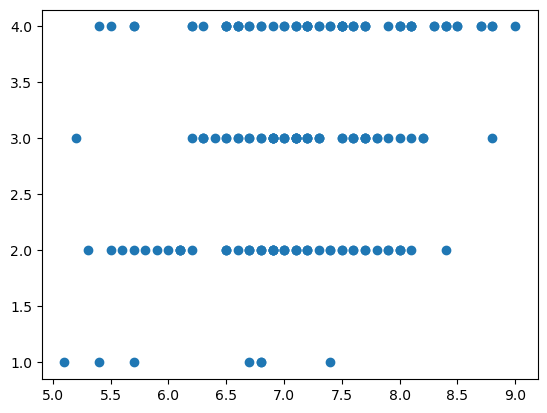

In [4]:
x = for_correlation["averageRating"]
y = for_correlation["enjoyment"]
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))
plt.show()

# Lets take a look at the score counts per genre

In [ ]:

genres = [x for x in list(watched) if x.startswith("genre_")]
titles = {}
for genre in genres:
    titles[genre] = genre.replace("genre_","")
genres_test = watched.loc[:,genres+['enjoyment']]
genres_test.rename(columns=titles, inplace=True)
genres_test


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,enjoyment
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2.0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4.0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
580,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,4.0
581,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4.0
583,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [ ]:
genre_test = genres_test.melt(id_vars=["enjoyment"],
    var_name="genre",
    value_name="bool")
for_genre_plot = genre_test.loc[genre_test.loc[:,"bool"]==1,["genre","enjoyment"]]
for_genre_plot

,genre,enjoyment
3,Action,2.0
19,Action,3.0
20,Action,2.0
21,Action,2.0
22,Action,2.0
...,...,...
11871,War,3.0
12166,War,3.0
12167,War,3.0
12380,Western,3.0


count the scores per enjoyment and make simple plot

<AxesSubplot:xlabel='genre,enjoyment'>

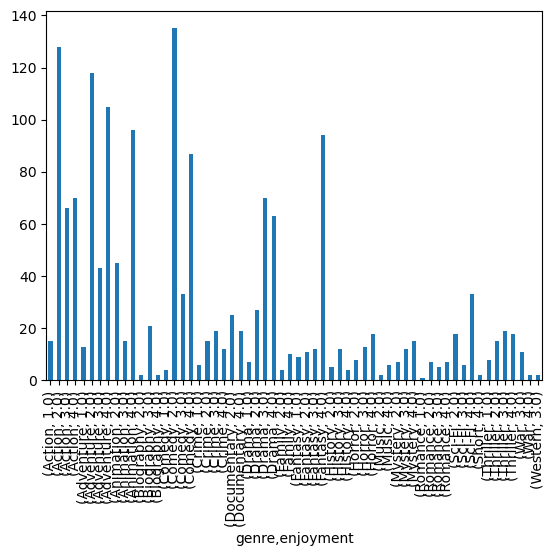

In [ ]:
score_counts_by_genre = for_genre_plot.groupby(['genre','enjoyment']).size()
score_counts_by_genre.plot(x="genre", kind="bar", stacked=False)

Make a better plot using matplotlib<br>
The list still contrains duplicates, somehow...<br>
I haven't watched 96 animation movies<br>
Oh wait, I haven't filtered the genres and enjoyment for multiple tconst, still need to do that

In [ ]:
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [ ]:
score_counts_by_genre_for_plot = score_counts_by_genre.reset_index(name='count')
score_counts_by_genre_for_plot.sort_values("count",ascending=False)

,genre,enjoyment,count
15,Comedy,2.0,135
1,Action,2.0,128
5,Adventure,2.0,118
7,Adventure,4.0,105
10,Animation,4.0,96
33,Fantasy,4.0,94
17,Comedy,4.0,87
26,Drama,3.0,70
3,Action,4.0,70
2,Action,3.0,66


studio e.d. ook toeveoegen

# making plots

## What genres are the movies i still want to watch?

In [ ]:
movies_to_watch = watched_film_fin[~watched_film_fin["watched"]]
genre_list = movies_to_watch["genres"].to_list()
genre_list = [ genre.split(",") for genre in genre_list ] # string to list
genre_list = [ item for sublist in genre_list for item in sublist ] # flatten the list
counted_genres = pd.DataFrame.from_dict(Counter(genre_list), orient='index').reset_index().sort_values(by=0, ascending=True)
y = counted_genres["index"]
x = counted_genres[0]
height = 0.5

fig, ax = plt.subplots()
ax.barh(y, x, align='center')
plt.title("Genres of listed movies yet unseen")
plt.show()


In [ ]:
movies_to_watch = watched_film_fin[watched_film_fin["watched"]]
genre_list = movies_to_watch["genres"].to_list()
genre_list = [ genre.split(",") for genre in genre_list ] # string to list
genre_list = [ item for sublist in genre_list for item in sublist ] # flatten the list
counted_genres = pd.DataFrame.from_dict(Counter(genre_list), orient='index').reset_index().sort_values(by=0, ascending=True)
y = counted_genres["index"]
x = counted_genres[0]
height = 0.5

fig, ax = plt.subplots()
ax.barh(y, x, align='center')
plt.title("Genres of listed movies seen")
plt.show()

## From what year?

In [ ]:
movies_to_watch = watched_film_fin[~watched_film_fin["watched"]]
year_list = movies_to_watch["startYear"].to_list()
year_list

counted_years = pd.DataFrame.from_dict(Counter(year_list), orient='index').reset_index().sort_values(by=0, ascending=True)
y = counted_years["index"]
x = counted_years[0]
height = 0.5

fig, ax = plt.subplots()
ax.barh(y, x, align='center')
plt.title("movies to watch by year")
plt.show()

: 